In [1]:
import pandas as pd
from paretoset import paretoset




In [2]:
drift_results = pd.read_csv("drift_results.csv")
pd.set_option('display.max_colwidth', None)
print(drift_results.keys())
print(drift_results)

Index(['Unnamed: 0', 'true drifts', 'detection rate', 'false negative rate',
       'false positive rate', 'delay rate', 'detections', 'execution time',
       'ram hours', 'param', 'observation', 'method'],
      dtype='object')
    Unnamed: 0           true drifts  detection rate  false negative rate  \
0            0               [10079]        0.333333             0.666667   
1            1                [9887]        0.333333             0.666667   
2            2                [9215]        0.333333             0.666667   
3            3                [9215]        0.333333             0.666667   
4            4                [9215]        0.333333             0.666667   
..         ...                   ...             ...                  ...   
85          85         [6667, 16900]        0.666667             0.333333   
86          86  [6583, 11597, 15617]        1.000000             0.000000   
87          87  [6583, 11597, 15617]        1.000000             0.000000   


In [3]:
pareto_pd = drift_results[["detection rate", "false positive rate", "false negative rate"]]
mask = paretoset(pareto_pd, sense=["max","min","min"])

pareto_results = drift_results[mask]
print(pareto_results[[ 'detection rate', 'false positive rate',
       'false negative rate', 'delay rate', 'param', 'observation','method']])


    detection rate  false positive rate  false negative rate   delay rate  \
57        1.000000                 0.25             0.000000   545.333333   
58        0.666667                 0.00             0.333333  7860.333333   

    param       observation method  
57  0.008  predicted labels     ph  
58  0.009  predicted labels     ph  


In [4]:
clusterd_frontier = drift_results[drift_results["detection rate"]> 0.6]
print(clusterd_frontier.head())
clusterd_frontier = clusterd_frontier[clusterd_frontier["false positive rate"] <= 0.25]
print(clusterd_frontier.head())

    Unnamed: 0           true drifts  detection rate  false negative rate  \
50          50  [5468, 12582, 18031]        1.000000             0.000000   
51          51  [5593, 10141, 18079]        1.000000             0.000000   
52          52         [5814, 12656]        0.666667             0.333333   
53          53         [5869, 10164]        0.666667             0.333333   
54          54  [6210, 12656, 17860]        1.000000             0.000000   

    false positive rate   delay rate  \
50             0.500000  2138.000000   
51             0.571429  1382.000000   
52             0.600000  8280.666667   
53             0.666667  7468.333333   
54             0.400000  2353.000000   

                                        detections  execution time  ram hours  \
50         [3483, 5468, 8869, 12582, 14466, 18031]        0.031336   0.000146   
51  [3493, 5593, 7215, 10141, 12549, 14468, 18079]        0.035133   0.000164   
52                [3558, 5814, 8929, 12656, 14824]   

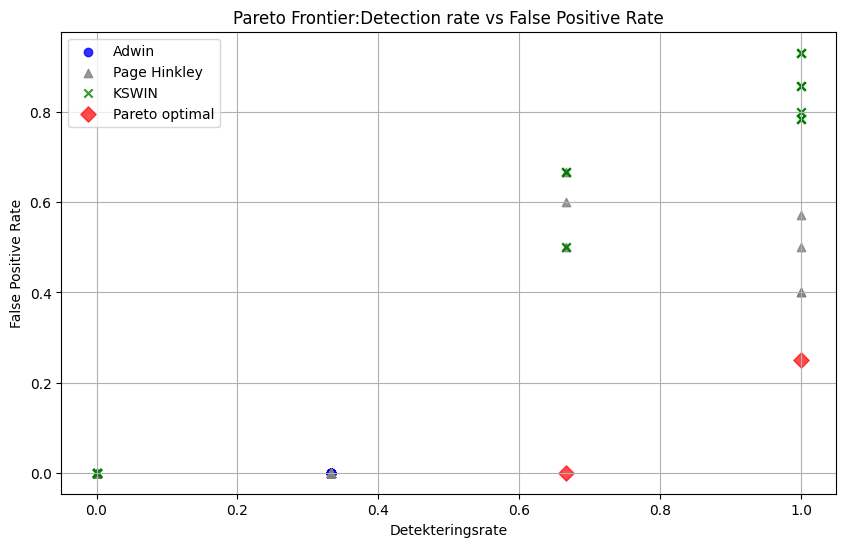

In [5]:
import matplotlib.pyplot as plt

# group non pareto optimal results by method 
non_pareto_opt = drift_results[~drift_results.index.isin(clusterd_frontier.index)]
plot_adwin = non_pareto_opt.loc[non_pareto_opt["method"]=='adwin']
plot_ph = non_pareto_opt.loc[non_pareto_opt["method"]=='ph']
plot_kswin = non_pareto_opt.loc[non_pareto_opt["method"]=='kswin']

pareto_adwin = pareto_results.loc[pareto_results["method"]=='adwin']
pareto_ph = pareto_results.loc[pareto_results["method"]=='ph']
pareto_kswin = pareto_results.loc[pareto_results["method"]=='kswin']
plt.figure(figsize=(10, 6))

plt.scatter(plot_adwin['detection rate'], plot_adwin['false positive rate'], color='blue',  marker='o', label = 'Adwin', alpha=0.8)
plt.scatter(plot_ph['detection rate'], plot_ph['false positive rate'], color='gray', label='Page Hinkley', marker='^', alpha=0.8)
plt.scatter(plot_kswin['detection rate'], plot_kswin['false positive rate'], color='green', label='KSWIN', marker='x', alpha=0.8)
plt.scatter(pareto_results['detection rate'], pareto_results['false positive rate'], color='red', marker='D', label='Pareto optimal', alpha=0.7, s=60)
plt.title('Pareto Frontier:Detection rate vs False Positive Rate')
plt.xlabel('Detection Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.grid(True)
plt.savefig("Fashion_pareto_DR_FPR.png")
plt.show()


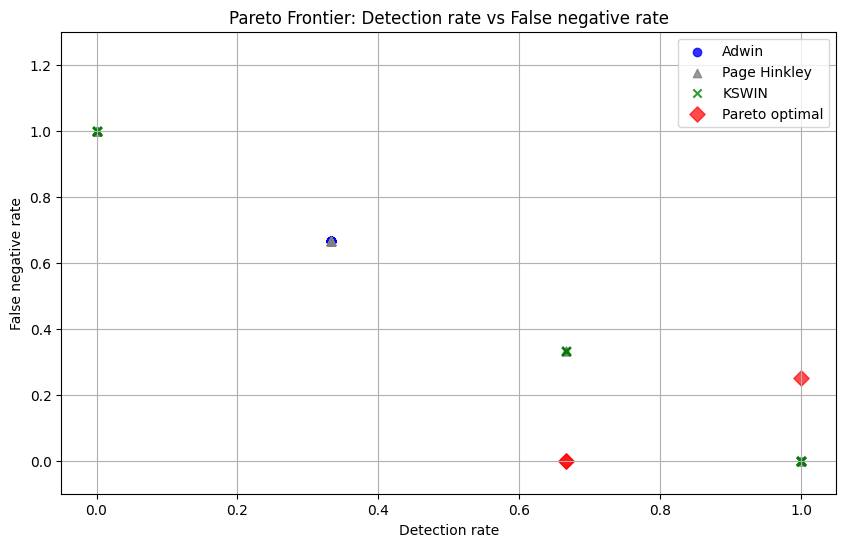

In [6]:
import matplotlib.pyplot as plt

# Assuming 'pareto_optimal_df' is already defined and contains the Pareto optimal rows
# Plotting false negative rate vs false positive rate
plt.figure(figsize=(10, 6))
plt.scatter(plot_adwin['detection rate'], plot_adwin["false negative rate"], color='blue',  marker='o', label = 'Adwin', alpha=0.8)
plt.scatter(plot_ph['detection rate'], plot_ph["false negative rate"], color='gray', label='Page Hinkley', marker='^', alpha=0.8)
plt.scatter(plot_kswin['detection rate'], plot_kswin["false negative rate"], color='green', label='KSWIN', marker='x', alpha=0.8)
plt.scatter(clusterd_frontier['detection rate'], clusterd_frontier['false positive rate'], color='red', marker='D', label='Pareto optimal',alpha=0.7, s=60)
plt.title('Pareto Frontier: Detection rate vs False negative rate')
plt.xlabel('Detection rate')
plt.ylabel('False negative rate')
plt.legend()
plt.grid(True)
plt.ylim(-0.1,1.3)
plt.savefig("Fashion_pareto_DR_FNR.png")
plt.show()

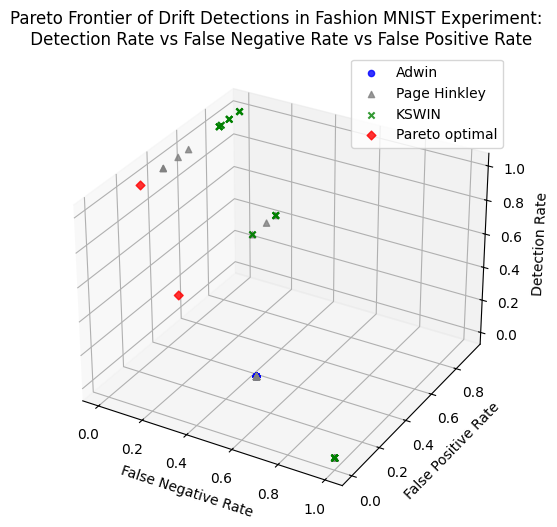

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(plot_adwin['false negative rate'], plot_adwin['false positive rate'], plot_adwin['detection rate'], color='blue', marker='o',label='Adwin', alpha=0.8)
ax.scatter(plot_ph['false negative rate'], plot_ph['false positive rate'], plot_ph['detection rate'], color='gray', marker='^', label='Page Hinkley', alpha=0.8)
ax.scatter( plot_kswin['false negative rate'], plot_kswin['false positive rate'], plot_kswin['detection rate'], color='green', marker='x', label='KSWIN', alpha=0.8)

# Highlight Pareto optimal points
ax.scatter(pareto_results['false negative rate'], pareto_results['false positive rate'],pareto_results['detection rate'], color='red', marker='D', label='Pareto optimal',alpha=0.8)

# Setting labels and title
ax.set_zlabel('Detection Rate')
ax.set_xlabel('False Negative Rate')
ax.set_ylabel('False Positive Rate')
ax.set_title('Pareto Frontier of Drift Detections in Fashion MNIST Experiment: \n Detection Rate vs False Negative Rate vs False Positive Rate')

plt.legend()
plt.savefig("Fashion_pareto_3D.png")
plt.show()